In [1]:
from src.data_loader import UCF101_Dataset_Loader
from src.training import DEVICE, Mixed_Precision_Single_Core_Trainer
from src.model_architectures import AlexNet3D
from src.utils import plot_metrics

import torch
import numpy as np

from tqdm import tqdm

In [2]:
ucf_data_dir = "data/UCF101/"
ucf_label_dir = "data/ucfTrainTestlist/"
frames_per_clip = 16
step_between_clips = 1

height = 112
width = 112

batch_size = 256

In [3]:
ucf101 = UCF101_Dataset_Loader(ucf_data_dir, ucf_label_dir, frames_per_clip, step_between_clips, height, width, batch_size)

Loading Training Data .........


100%|██████████| 85/85 [00:26<00:00,  3.18it/s]


Loading Testing Data .........


100%|██████████| 85/85 [00:23<00:00,  3.58it/s]



Total number of train samples: 6633
Total number of test samples: 2532
Total number of (train) batches: 26
Total number of (test) batches: 10


Total Number of Classes: 10


#### Model Training

In [4]:
torch.manual_seed(69)
alex_net_model = AlexNet3D((frames_per_clip, height, width), len(ucf101.classes)).to(device=DEVICE)
alex_net_model

AlexNet3D(
  (max_pool): MaxPool3d(kernel_size=3, stride=2, padding=(1, 1, 1), dilation=1, ceil_mode=False)
  (conv1): Conv3d(3, 96, kernel_size=(5, 5, 5), stride=(2, 2, 2), padding=(3, 0, 0))
  (conv2): Conv3d(96, 256, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(3, 2, 2))
  (conv3): Conv3d(256, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv4): Conv3d(384, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv5): Conv3d(384, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (linear1): Linear(in_features=100352, out_features=4096, bias=True)
  (linear2): Linear(in_features=4096, out_features=4096, bias=True)
  (linear3): Linear(in_features=4096, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=1)
)

In [5]:
EPOCHS = 10
optimizer = torch.optim.Adam(alex_net_model.parameters(), lr=4e-5)
mp_trainer = Mixed_Precision_Single_Core_Trainer(len(ucf101.classes))

In [6]:
output_metrics = mp_trainer.training_loop(alex_net_model,ucf101.train_loader,ucf101.test_loader,EPOCHS, optimizer)

100%|██████████| 10/10 [03:29<00:00, 21.00s/it]


For Epoch 1 We Train Loss:2.2210479974746704, Test Loss:2.287290596961975, Train Accuracy:0.1619621145610626, Test Accuracy:0.1585061028599739


100%|██████████| 10/10 [03:22<00:00, 20.26s/it]


For Epoch 2 We Train Loss:1.964563814493326, Test Loss:2.2090367317199706, Train Accuracy:0.38232241570949554, Test Accuracy:0.21398605406284332


100%|██████████| 10/10 [03:06<00:00, 18.65s/it]


For Epoch 3 We Train Loss:1.8105804140751178, Test Loss:2.0701916217803955, Train Accuracy:0.5445621850398871, Test Accuracy:0.38110976815223696


100%|██████████| 10/10 [03:02<00:00, 18.25s/it]


For Epoch 4 We Train Loss:1.7705971598625183, Test Loss:2.2014942169189453, Train Accuracy:0.5879586980893061, Test Accuracy:0.22610669434070588


100%|██████████| 10/10 [02:57<00:00, 17.79s/it]


For Epoch 5 We Train Loss:1.7663996403033917, Test Loss:2.113723802566528, Train Accuracy:0.5917484783209287, Test Accuracy:0.329390624165535


100%|██████████| 10/10 [02:54<00:00, 17.46s/it]


For Epoch 6 We Train Loss:1.7608486138857329, Test Loss:2.1617466688156126, Train Accuracy:0.5965314507484436, Test Accuracy:0.26428012251853944


100%|██████████| 10/10 [03:03<00:00, 18.34s/it]


For Epoch 7 We Train Loss:1.7624831749842718, Test Loss:2.154472303390503, Train Accuracy:0.5952609502352201, Test Accuracy:0.2670362591743469


100%|██████████| 10/10 [02:51<00:00, 17.20s/it]


For Epoch 8 We Train Loss:1.7587462205153246, Test Loss:2.1860560894012453, Train Accuracy:0.5977554894410647, Test Accuracy:0.2548532962799072


100%|██████████| 10/10 [03:42<00:00, 22.21s/it]


For Epoch 9 We Train Loss:1.759065710581266, Test Loss:2.2103095054626465, Train Accuracy:0.5971881976494422, Test Accuracy:0.20000000298023224


100%|██████████| 10/10 [03:01<00:00, 18.15s/it]

For Epoch 10 We Train Loss:1.7571805440462553, Test Loss:2.089319634437561, Train Accuracy:0.5981532633304596, Test Accuracy:0.36354643702507017


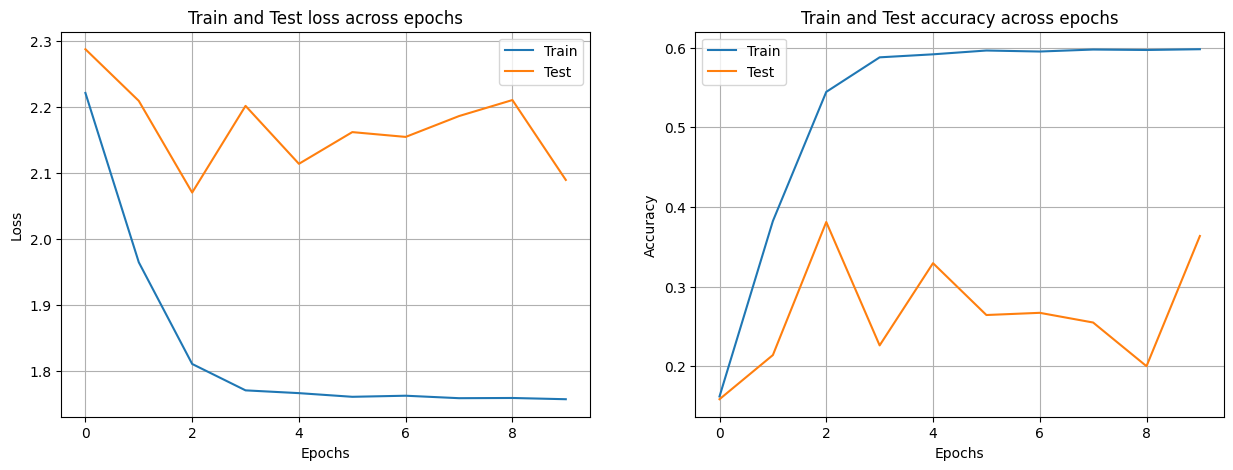

In [7]:
plot_metrics(EPOCHS, output_metrics)

In [8]:
torch.save(alex_net_model.state_dict(), 'models/alex_net_base_data.pth')